In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data

,Rate,Comments
0,0,chỉ có dây cáp nguồn không có adapter sao sử d...
1,0,Chất lượng quá kém Mới dùng được 2 ngày loa ba...
2,0,Usb tôi vừa mới nhận usb này Rất bực bội vì cá...
3,2,Tuyệt vời. Hàng FPT cửa hàng
4,1,Chưa đo đúng bước chân rõ Nhiều khi gián đoạn ...
...,...,...
3034,0,không có bộ thu đi kèm Vừa nhận hàng xong tức ...
3035,0,Cũng bình thường Không mạnh như kỹ vọng Chắc t...
3036,2,tốt tốt đang tiền khi bỏ ra để mua giao hàng n...
3037,0,giao hàng lâu rửa tay một tí đã cháy màn hình ...


In [5]:
data.isnull().sum()

Rate        0
Comments    0
dtype: int64

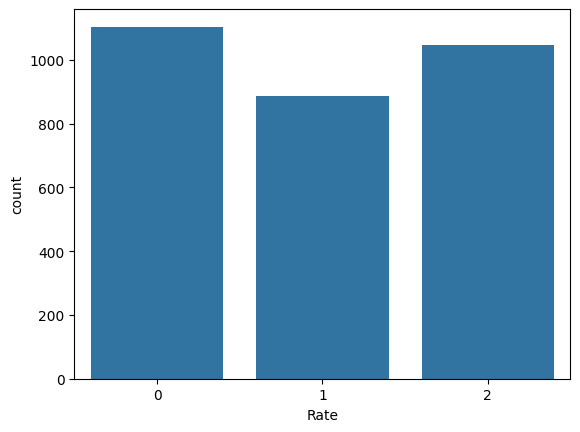

In [6]:
sns.countplot(data,x='Rate')
plt.show()

# Pre processing

## To lowercase

In [7]:
data['Comments'] = data['Comments'].str.lower()
data['Comments']

0       chỉ có dây cáp nguồn không có adapter sao sử d...
1       chất lượng quá kém mới dùng được 2 ngày loa ba...
2       usb tôi vừa mới nhận usb này rất bực bội vì cá...
3                            tuyệt vời. hàng fpt cửa hàng
4       chưa đo đúng bước chân rõ nhiều khi gián đoạn ...
                              ...                        
3034    không có bộ thu đi kèm vừa nhận hàng xong tức ...
3035    cũng bình thường không mạnh như kỹ vọng chắc t...
3036    tốt tốt đang tiền khi bỏ ra để mua giao hàng n...
3037    giao hàng lâu rửa tay một tí đã cháy màn hình ...
3038    quá tuyệt vời với giá và miễn phí giao hàng ch...
Name: Comments, Length: 3039, dtype: object

## Remove punctuation

In [8]:
data['Comments'] = data['Comments'].str.translate(str.maketrans('', '', string.punctuation))
data['Comments']


0       chỉ có dây cáp nguồn không có adapter sao sử d...
1       chất lượng quá kém mới dùng được 2 ngày loa ba...
2       usb tôi vừa mới nhận usb này rất bực bội vì cá...
3                             tuyệt vời hàng fpt cửa hàng
4       chưa đo đúng bước chân rõ nhiều khi gián đoạn ...
                              ...                        
3034    không có bộ thu đi kèm vừa nhận hàng xong tức ...
3035    cũng bình thường không mạnh như kỹ vọng chắc t...
3036    tốt tốt đang tiền khi bỏ ra để mua giao hàng n...
3037    giao hàng lâu rửa tay một tí đã cháy màn hình ...
3038    quá tuyệt vời với giá và miễn phí giao hàng ch...
Name: Comments, Length: 3039, dtype: object

In [9]:
data['Length'] = data['Comments'].apply(len)

## Tokenizer

In [10]:
from underthesea import word_tokenize

data['tokens'] = data['Comments'].apply(word_tokenize)

In [11]:
data

,Rate,Comments,Length,tokens
0,0,chỉ có dây cáp nguồn không có adapter sao sử d...,133,"[chỉ, có, dây cáp, nguồn, không, có, adapter, ..."
1,0,chất lượng quá kém mới dùng được 2 ngày loa ba...,113,"[chất lượng, quá, kém, mới, dùng, được, 2, ngà..."
2,0,usb tôi vừa mới nhận usb này rất bực bội vì cá...,148,"[usb, tôi, vừa mới, nhận, usb, này, rất, bực b..."
3,2,tuyệt vời hàng fpt cửa hàng,27,"[tuyệt vời, hàng, fpt, cửa hàng]"
4,1,chưa đo đúng bước chân rõ nhiều khi gián đoạn ...,133,"[chưa, đo, đúng, bước, chân, rõ, nhiều, khi, g..."
...,...,...,...,...
3034,0,không có bộ thu đi kèm vừa nhận hàng xong tức ...,120,"[không, có, bộ, thu, đi, kèm, vừa, nhận, hàng,..."
3035,0,cũng bình thường không mạnh như kỹ vọng chắc t...,99,"[cũng, bình thường, không, mạnh, như, kỹ vọng,..."
3036,2,tốt tốt đang tiền khi bỏ ra để mua giao hàng n...,68,"[tốt, tốt, đang, tiền, khi, bỏ, ra, để, mua, g..."
3037,0,giao hàng lâu rửa tay một tí đã cháy màn hình ...,73,"[giao, hàng, lâu, rửa tay, một tí, đã, cháy, m..."


## Remove stopwords

In [12]:
with open('stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.read().splitlines()


In [13]:
data['comment_without_stopwords'] = data['Comments'].\
apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [14]:
data

,Rate,Comments,Length,tokens,comment_without_stopwords
0,0,chỉ có dây cáp nguồn không có adapter sao sử d...,133,"[chỉ, có, dây cáp, nguồn, không, có, adapter, ...",dây cáp nguồn adapter sử dụng dây cáp nguồn ad...
1,0,chất lượng quá kém mới dùng được 2 ngày loa ba...,113,"[chất lượng, quá, kém, mới, dùng, được, 2, ngà...",chất lượng kém dùng 2 loa bass âm rè rè dù mở ...
2,0,usb tôi vừa mới nhận usb này rất bực bội vì cá...,148,"[usb, tôi, vừa mới, nhận, usb, này, rất, bực b...",usb usb bực bội nắp usb cứng thể mở hộp đựng u...
3,2,tuyệt vời hàng fpt cửa hàng,27,"[tuyệt vời, hàng, fpt, cửa hàng]",tuyệt vời hàng fpt cửa hàng
4,1,chưa đo đúng bước chân rõ nhiều khi gián đoạn ...,133,"[chưa, đo, đúng, bước, chân, rõ, nhiều, khi, g...",đo đúng bước chân rõ gián đoạn hài lòng hàng t...
...,...,...,...,...,...
3034,0,không có bộ thu đi kèm vừa nhận hàng xong tức ...,120,"[không, có, bộ, thu, đi, kèm, vừa, nhận, hàng,...",thu kèm hàng xong tức hàng kèm thu chuột đề ng...
3035,0,cũng bình thường không mạnh như kỹ vọng chắc t...,99,"[cũng, bình thường, không, mạnh, như, kỹ vọng,...",bình mạnh kỹ vọng tường dày tiki giao hóa đơn
3036,2,tốt tốt đang tiền khi bỏ ra để mua giao hàng n...,68,"[tốt, tốt, đang, tiền, khi, bỏ, ra, để, mua, g...",tốt tốt tiền bỏ mua giao hàng nhanh đóng gói c...
3037,0,giao hàng lâu rửa tay một tí đã cháy màn hình ...,73,"[giao, hàng, lâu, rửa tay, một tí, đã, cháy, m...",giao hàng lâu rửa tay tí cháy màn hình tóm chố...


### Bag of word

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer()

text = data['comment_without_stopwords'].tolist()

binaryVector = bow.fit_transform(text)

In [16]:
from sklearn.model_selection import train_test_split
# Seperate dataset into test and train

y = data['Rate']
X = binaryVector

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)

print([x.shape for x in [train_X, test_X, train_y, test_y]])

[(2279, 3309), (760, 3309), (2279,), (760,)]


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Now for testing the naive bayes model

MNB = MultinomialNB()
MNB.fit(train_X, train_y)

predicted = MNB.predict(test_X)
accuracy_score = metrics.accuracy_score(test_y,predicted)
confusion_count = metrics.confusion_matrix(predicted, test_y)


print('Accuracy: ',accuracy_score,'\n')
print('Confusion Matrix:\n',confusion_count)

Accuracy:  0.7618421052631579 

Confusion Matrix:
 [[222  34   8]
 [ 41 141  22]
 [ 18  58 216]]


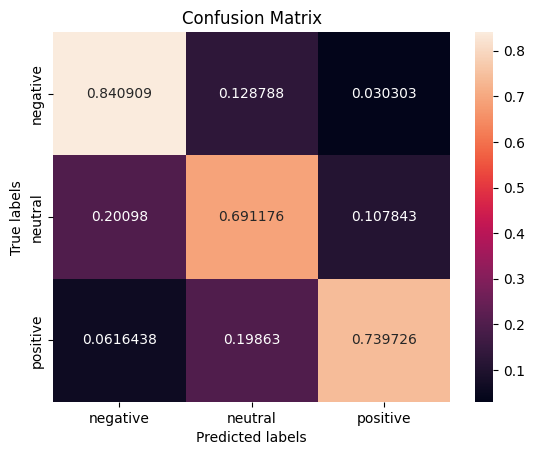

In [18]:
# Lets plot the results properly

confusion = metrics.confusion_matrix(predicted, test_y, normalize = 'true')

ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);

In [19]:
# Lets look for the most important words

neg_class_prob_sorted = MNB.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = MNB.feature_log_prob_[1, :].argsort()[::-1]

print('Negative words:\n', np.take(bow.get_feature_names_out(), neg_class_prob_sorted[:25]))
print('\nPositive words:\n', np.take(bow.get_feature_names_out(), pos_class_prob_sorted[:25]))

Negative words:
 ['hàng' 'mua' 'sản' 'phẩm' 'nghe' 'dùng' 'giao' 'shop' 'lòng' 'pin' 'hài'
 'tai' 'máy' 'tiki' 'kết' 'nối' 'điện' 'lỗi' 'dụng' 'sạc' 'bảo' 'sử' 'đổi'
 'hành' 'bên']

Positive words:
 ['hàng' 'tốt' 'sản' 'phẩm' 'nghe' 'dùng' 'giao' 'bình' 'mua' 'giá' 'pin'
 'hơi' 'nhanh' 'máy' 'ổn' 'chuột' 'tai' 'dụng' 'tiki' 'tạm' 'sử' 'bảo'
 'khá' 'lượng' 'ok']


In [20]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation
scores = cross_val_score(MNB, X, y, cv=5)

# Print cross validation scores
print(scores)

# Print the mean score
print(scores.mean())


[0.75657895 0.74506579 0.75       0.74506579 0.71828666]
0.742999436399896


In [21]:
import tkinter as tk

def show_result():
     comment = entry.get("1.0", tk.END)
     processed_comment = ' '.join([word for word in word_tokenize(comment) if word not in stopwords])
     processed_comment = bow.transform([processed_comment])
     prediction = MNB.predict(processed_comment)
     prediction = int(prediction[0])
     if prediction == 0:
         result = "Tiêu cực"
     elif prediction == 1:
         result = "Bình thường"
     else:
         result = "Tích cực"
     result_entry.config(state='normal')
     result_entry.insert(0, result)
     result_entry.config(state='readonly')
    
def clear_entry():
     result_entry.config(state='normal')
     result_entry.delete(0, tk.END)
     result_entry.config(state='readonly')
     entry.delete("1.0", tk.END)
root = tk.Tk()
root.title("Phân tích cảm xúc khách hàng")
window_width = 500
window_height = 300

custom_font = ("Arial", 19)

screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()

x_position = (screen_width - window_width) // 2
y_position = (screen_height - window_height) // 2

root.geometry(f"{window_width}x{window_height}+{x_position}+{y_position}")

entry = tk.Text(root, height=6, width=40)
entry.place(x=50, y=60)

button = tk.Button(root, text="Hiển thị kết quả", command=show_result, padx=10, pady=1)
button.place(x=50, y=180)

result_entry = tk.Entry(root, font=custom_font,width= 10)
result_entry.place(x=202, y=180)
result_entry.insert(0, "  ")
result_entry.configure(state='readonly')

reset_button = tk.Button(root, text="Reset", command=clear_entry, padx=10, pady=1)
reset_button.place(x=390,y=180)

root.mainloop()
